# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [4]:
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Набор данных представляет собой таблицу, содержащую 22 столбца и 23699 строк.

Каждая строка содержит различную информацию о продаваемой недвижимости.



### Шаг 2. Предобработка данных

In [2]:
# 1) Заполнение пропусков и замена типа данных, столбец с датой уже приведен в читабельный вид, поэтому его не меняю

#data.isnull().sum()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

data['is_apartment'] = data['is_apartment'].fillna(False)
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype('int')

data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('int')

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

#print(data['locality_name'].value_counts())
#print(data['locality_name'].describe())
#print(data['airports_nearest'].describe())
data['locality_name'] = data['locality_name'].fillna('7777777')

#print(data['ceiling_height'].describe())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#print(data['living_area'].describe())
#print(data['total_area'].describe())
data['living_area'] = data['living_area'].fillna(data['living_area'].mean())

#print(data['kitchen_area'].describe())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())


data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].mean())

#print(data['cityCenters_nearest'].describe())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
print(data['cityCenters_nearest'].value_counts())

#print(data['parks_nearest'].describe())

data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

#print(data['ponds_nearest'].describe())

data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

#print(data['days_exposition'].describe())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition'] = data['days_exposition'].astype('int')

data['rooms'] = data['rooms'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')




# 2) Удаление дубликатов

data['locality_name'] = data['locality_name'].str.lower()
data.head(20)
data = data.drop_duplicates()
data.duplicated().sum()

# 3) Категоризация данных

def categorize_floor(row):
           
    floors_total = row['floors_total']
    floor_current = row['floor']
   
    if floor_current == 1:
        return 'первый'
    elif floor_current == floors_total:
        return 'последний'
    else:
        return 'другой'


data.info()
data.isnull().sum()


13098.5    5519
8460.0       61
20802.0      32
10720.0      30
20444.0      27
           ... 
54214.0       1
13104.0       1
11280.0       1
27218.0       1
208.0         1
Name: cityCenters_nearest, Length: 7643, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           2

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

# Шаг 2. Вывод

##### Замена пропусков

Пропущенные значения в столбцах заменил на ноль, т.к.:
    
    1) Если не указано наличие балкона, то самое вероятное, что его нет

    2) Если не уточняется, является ли недвижимость квартирой, то скорее всего это частный дом

    3) Если не уточнено наличие парков в радиусе 3км,  то самое вероятное, что их нет

    В столбце 'locality_name' заменил отсутствующие значения на маркер, чтобы при дальнейшем анализе было видно,
    что эти значения были пропущены
   
##### Удаление дубликатов

В столбце с названием населенного пункта перевел все строки в нижний регистр и удалил дубликаты

   
##### Категоризация данных

Разбил данные по этажам на несколько групп для последующего анализа влияния этого фактора на ценообразование.


   
##### Лемматизация данных

Посчитал, что данных для лемматизации в таблице нет
    




### Шаг 3. Посчитайте и добавьте в таблицу

In [3]:
data['price_for_m_sq'] = data['last_price']/data['total_area']
data['time'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%d')
data['living_area_share'] = data['living_area']/ data['total_area']
data['kitchen_area_share'] = data['kitchen_area']/ data['total_area']
#print(data['floor'].unique())
#print(data['floors_total'].unique())

 
data['floor_category'] = data.apply(categorize_floor, axis =1)

data.head(15)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m_sq,time,living_area_share,kitchen_area_share,floor_category
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,...,1,482.0,2,755.0,95,120370.370370,2019-03-07,0.472222,0.231481,другой
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.65,11,18.600000,1,False,...,0,455.0,0,502.0,81,82920.792079,2018-12-04,0.460396,0.272277,первый
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5,34.300000,4,False,...,1,90.0,2,574.0,558,92785.714286,2015-08-20,0.612500,0.148214,другой
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.65,14,34.457852,9,False,...,2,84.0,3,234.0,424,408176.100629,2015-07-24,0.216716,0.057233,другой
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,...,2,112.0,1,48.0,121,100000.000000,2018-06-19,0.320000,0.410000,другой
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.65,12,14.400000,5,False,...,0,455.0,0,502.0,55,95065.789474,2018-09-10,0.473684,0.299342,другой
6,6,3700000,37.30,2017-11-02T00:00:00,1,2.65,26,10.600000,6,False,...,0,455.0,0,502.0,155,99195.710456,2017-11-02,0.284182,0.386059,другой
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.65,24,34.457852,22,False,...,0,455.0,0,502.0,95,110544.692737,2019-04-18,0.481255,0.263966,другой
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.65,27,15.430000,26,False,...,0,455.0,0,502.0,189,87454.764777,2018-05-23,0.465320,0.265682,другой
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.600000,7,False,...,0,455.0,0,502.0,289,88524.590164,2017-02-26,0.714754,0.106557,другой


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


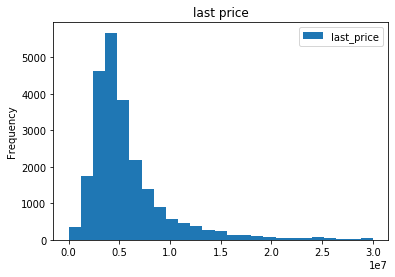

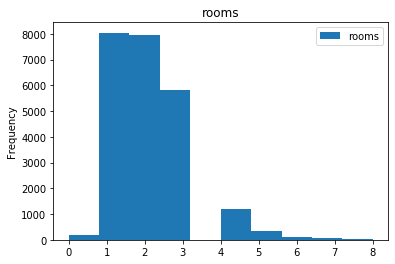

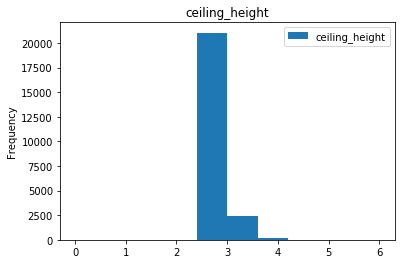

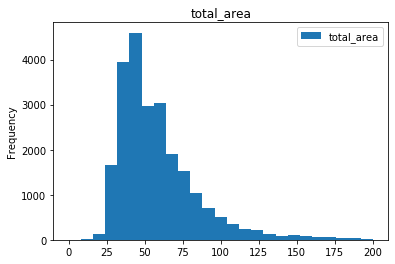

In [4]:
#1
print(data['total_area'].describe())
print(data['last_price'].describe())
print(data['ceiling_height'].describe())
print(data['rooms'].describe())
data.plot(y='last_price', title = 'last price', kind = 'hist', bins = 25, range =(0,  30000000))
data.plot(y='rooms', title = 'rooms', kind = 'hist', bins = 10, range =(0, 8))
data.plot(y='ceiling_height', title = 'ceiling_height', kind = 'hist', bins = 10, range = (0, 6))
data.plot(y='total_area', title = 'total_area', kind = 'hist', bins = 25, range = (0, 200))


Из построенных по данным гистограмм можно сделать следующие выводы:

    1) Основной диапазон цен на недвижимость охватывает от 3млн до 5млн

    2) Чаще всего можно найти недвижимость с одной-тремя комнатами

    3) Самые распространенные для продажи объекты недвижимости имеют высоту потолков в диапазоне 2,4-3 метра

    4) Чаще всего можно найти недвижимость общей площадью 30-60 м^2

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64
1141


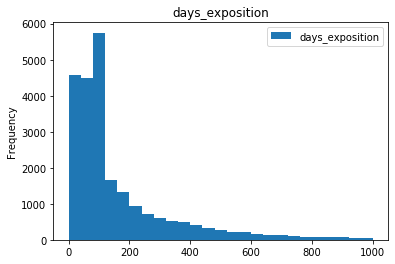

In [5]:

#2
print(data['days_exposition'].describe())
data.plot(y='days_exposition', title = 'days_exposition', kind = 'hist', bins = 25, range = (0, 1000))
print(len(data['days_exposition'].unique()))

Из построенной по данным актуальности объявлений гистограммы можно сделать вывод о том, что недвижимость чаще всего удается продать за 70-100 дней

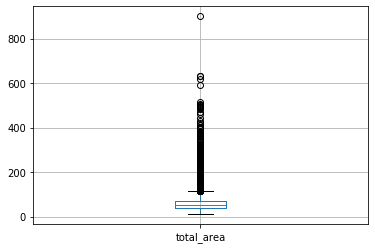

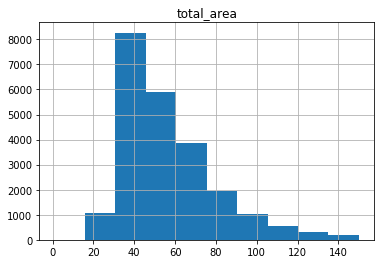

In [6]:
#3
def make_boxplot(column):
    data.boxplot(column = column)

def make_hist(column, bins, first, second):
    data.hist(column = column, bins = bins, range =(first, second))

make_boxplot('total_area')
make_hist('total_area', 10, 1, 150)

Наибольшую часть недвижимости составляет группа общей площадью от 18 до 140 м^2.

Чаще всего можно найти недвижимость площадью от 35 до 100 м^2

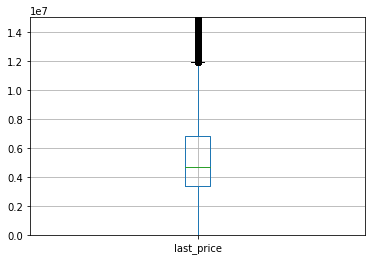

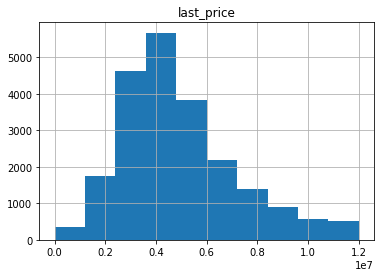

In [7]:
make_boxplot('last_price')
plt.ylim(0, 15000000)
plt.xlim(0, 2)
make_hist('last_price', 10, 0, 12000000)

Наибольшую часть недвижимости по стоимости составляет группа цен от 1млн до 12млн 

Чаще всего можно найти недвижимость площадью стоимостью от 3млн до 7млн

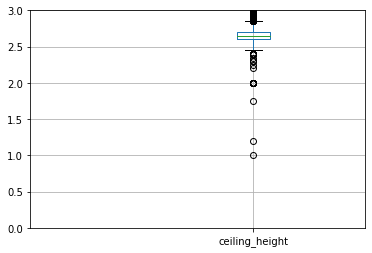

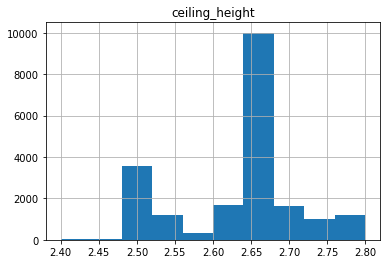

In [8]:
make_boxplot('ceiling_height')
plt.ylim(0, 3)
plt.xlim(0, 1.5)
make_hist('ceiling_height', 10, 2.4, 2.8)



Наибольшую часть недвижимости по высоте потолков составляет группа от 2.4м до 2.8м.

Чаще всего можно найти недвижимость с выстой потолков 2.5м - 2.7м

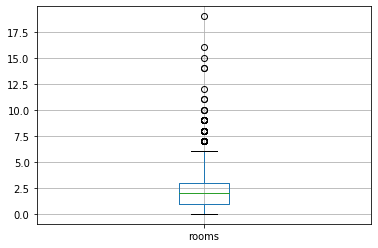

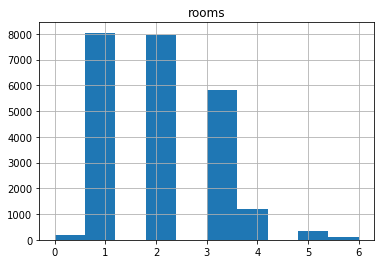

In [9]:
make_boxplot('rooms')
make_hist('rooms', 10, 0, 6)

Наибольшую часть недвижимости по количеству комнат составляет группа от 1 до 6

Чаще всего можно найти недвижимость с количеством комнат 1-4


In [10]:
#исходя из построенных графиков отслеживаем аномальные значения и создаем срез данных уже без них
data = data.query('10 < total_area < 150 and last_price < 12000000 and 2.4 < ceiling_height < 2.8 and rooms < 6')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18685 entries, 1 to 23698
Data columns (total 27 columns):
total_images            18685 non-null int64
last_price              18685 non-null int64
total_area              18685 non-null float64
first_day_exposition    18685 non-null object
rooms                   18685 non-null int64
ceiling_height          18685 non-null float64
floors_total            18685 non-null int64
living_area             18685 non-null float64
floor                   18685 non-null int64
is_apartment            18685 non-null bool
studio                  18685 non-null bool
open_plan               18685 non-null bool
kitchen_area            18685 non-null float64
balcony                 18685 non-null int64
locality_name           18685 non-null object
airports_nearest        18685 non-null float64
cityCenters_nearest     18685 non-null int64
parks_around3000        18685 non-null int64
parks_nearest           18685 non-null float64
ponds_around3000        1

<font color='red'> Ок. </font>

last_price
12190          111.834862
430000       11053.849903
440000       11000.000000
450000       11275.007030
470000       11575.971697
                ...      
11980000    149972.593831
11983878    106903.461195
11990000    116038.547121
11995000    143104.271057
11999000    128464.434003
Name: price_for_m_sq, Length: 2019, dtype: float64

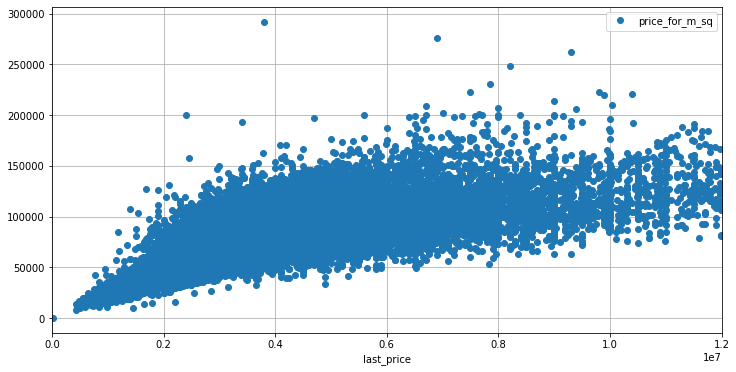

In [11]:
#4
data.plot(x='last_price', y='price_for_m_sq', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0, 12000000)
data_pivot_lst_price = data.pivot_table(index='last_price',aggfunc='mean')['price_for_m_sq']
data_pivot_lst_price
#Грaфик зависимости общей цены от цены на квадратный метр дает мне полагать, 
#что цена за квадратный метр  оказывает  влияниe на общую цену, т.е. чем выше цена за м^2, тем выше общая цена

0.615819164812097


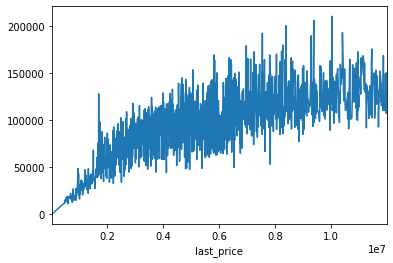

In [80]:
data_pivot_lst_price = data.pivot_table(index='last_price',aggfunc='mean')['price_for_m_sq']
data_pivot_lst_price.plot()
print(data['price_for_m_sq'].corr(data['last_price']))


0.4296811148858895


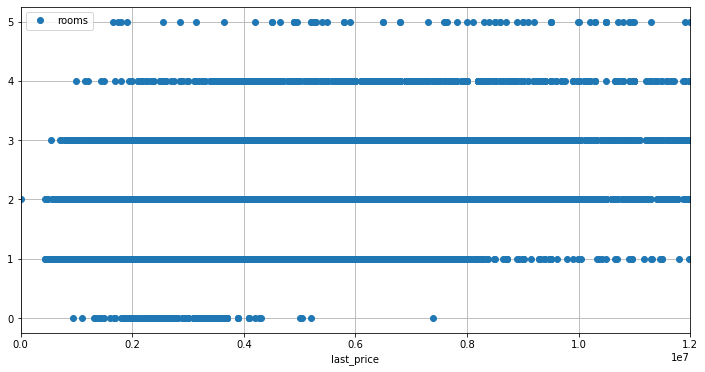

In [81]:
data.plot(x='last_price', y='rooms', 
             style='o', grid=True, figsize=(12, 6))

plt.xlim(0, 12000000)
data_pivot_rooms = data.pivot_table(index='rooms',aggfunc='mean')['last_price']
data_pivot_rooms
print(data['rooms'].corr(data['last_price']))
#Грaфик зависимости общей цены от количества комнат дает мне полагать, 
#что количество комнат оказывает прямое влияние на финальную цену.

(0, 12000000)

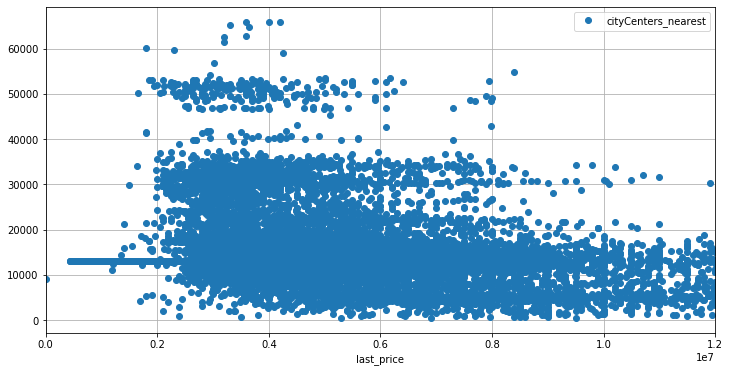

In [14]:
data.plot(x='last_price', y='cityCenters_nearest', 
             style='o', grid=True, figsize=(12, 6))

plt.xlim(0, 12000000)



#Грaфик зависимости общей цены от расстояния до центра города (м) дает мне полагать, 
#что расстояние до центра города (м) влияет на формирование итоговой цены за недвижимость. Недвижимость ближе к центру города будет дороже.

cityCenters_nearest
467      5300000.0
472      6900000.0
515      9500000.0
623      8400000.0
650      8500000.0
           ...    
64857    3650000.0
65105    3300000.0
65764    4000000.0
65952    3600000.0
65968    4200000.0
Name: last_price, Length: 6011, dtype: float64
-0.16618634380527522


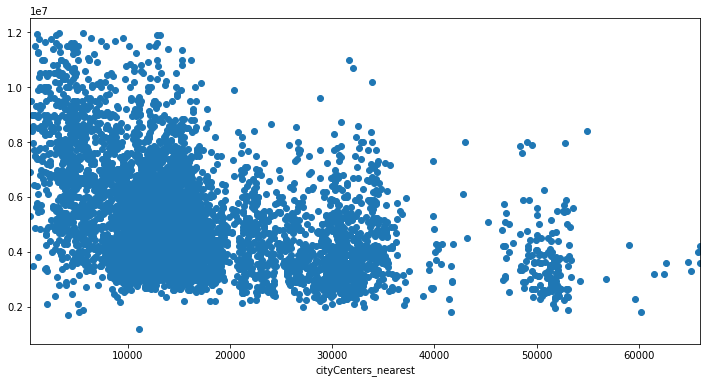

In [82]:
data_pivot_center = data.pivot_table(index='cityCenters_nearest',aggfunc='mean')['last_price']
print(data_pivot_center)
data_pivot_center.plot(figsize=(12, 6),style='o')
print(data['cityCenters_nearest'].corr(data['last_price']))

floor_category
другой       4.777734e+06
первый       3.858060e+06
последний    4.087013e+06
Name: last_price, dtype: float64

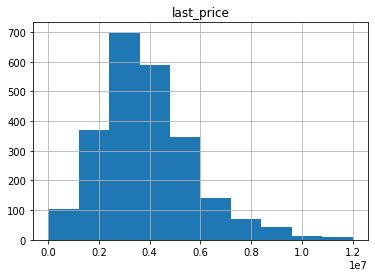

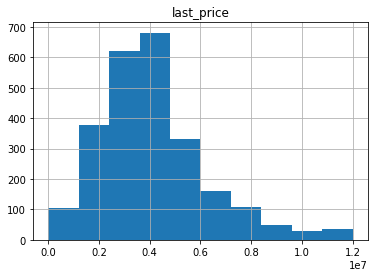

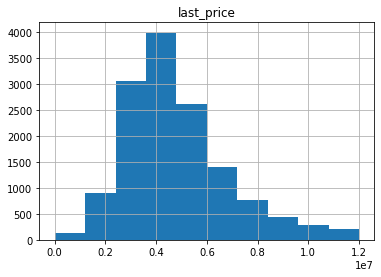

In [16]:
data_floor_cat = [(data[data['floor_category']== 'первый']['floor_category'].count()) ,
                  (data[data['floor_category']== 'последний']['floor_category'].count()) ,
                  (data[data['floor_category']== 'другой']['floor_category'].count())]

data_first = data.query('floor_category == "первый"')
data_first.hist(bins = 10, column = ['floor_category', 'last_price'], range = (0, 12000000))

data_last = data.query('floor_category == "последний"')
data_last.hist(bins = 10, column = ['floor_category', 'last_price'], range = (0, 12000000))

data_other = data.query('floor_category == "другой"')
data_other.hist(bins = 10, column = ['floor_category', 'last_price'], range = (0, 12000000))

data_pivot_floor = data.pivot_table(index='floor_category',aggfunc='mean')['last_price']
data_pivot_floor

Сравнив гистограммы по влиянию расположения этажа на финальную цену я заметил, что аппартаменты на первых этажах и последнем дешевле остальных, т.е. расположение самой недвижимости в доме влияет на формирование итоговой цены.

(0, 12000000)

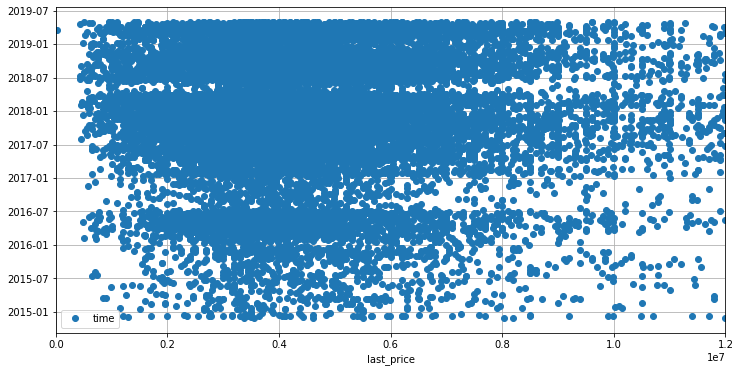

In [93]:
data.plot(x='last_price', y='time', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0, 12000000)

time
2014-11-27    6.624488e+06
2014-11-29    5.500000e+06
2014-12-04    3.960875e+06
2014-12-05    1.300000e+06
2014-12-08    3.413333e+06
                  ...     
2019-04-29    4.011692e+06
2019-04-30    5.255238e+06
2019-05-01    5.753395e+06
2019-05-02    4.875000e+06
2019-05-03    4.303529e+06
Name: last_price, Length: 1455, dtype: float64


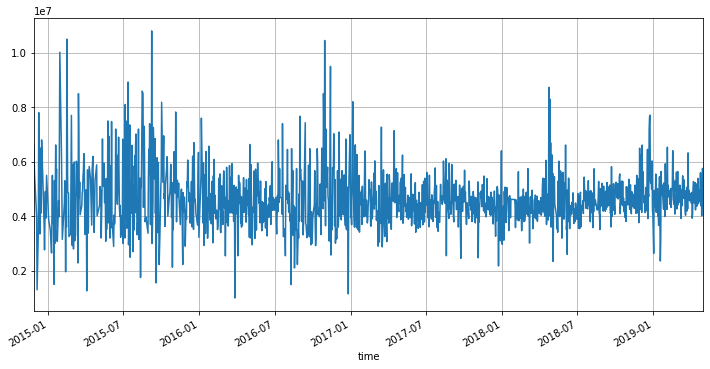

In [68]:
data_pivot_time = data.pivot_table(index='time',aggfunc='mean')['last_price']
print(data_pivot_time)
data_pivot_time.plot(x='last_price', y='time', 
             style='-', grid=True, figsize=(12, 6))

In [84]:
#5
pt = data.pivot_table(index='locality_name',aggfunc='count')['first_day_exposition']
#pt = pt.reset_index().sort_values(['first_day_exposition'], ascending=[False]).set_index(['locality_name'])
tp = data.pivot_table(index='locality_name',aggfunc='mean')['price_for_m_sq']
pttp = pd.merge(pt, tp, on = 'locality_name')
pttp = pttp.reset_index().sort_values(['first_day_exposition'], ascending=[False]).set_index(['locality_name'])
pttp = pttp.drop(pttp.index[10:])
pttp

,first_day_exposition,price_for_m_sq
locality_name,,
санкт-петербург,11405,103780.164397
посёлок мурино,505,85549.099111
посёлок шушары,422,78688.674980
всеволожск,356,66925.124253
посёлок парголово,322,90308.306532
колпино,311,75409.918568
пушкин,291,99550.240902
деревня кудрово,283,92353.179714
гатчина,281,68182.425592


(0, 5000)

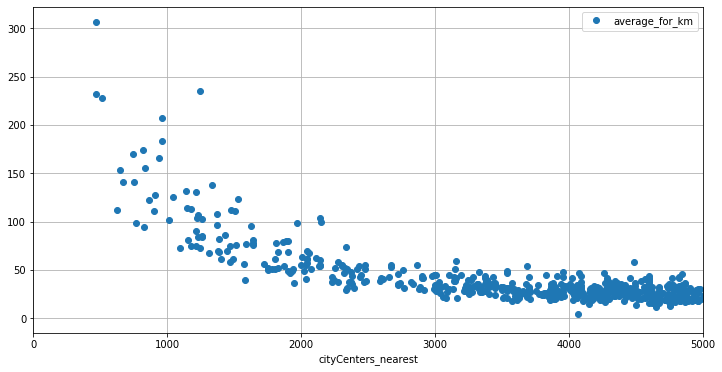

In [70]:
good_data = data[data['locality_name'] == 'санкт-петербург']
data_we_need = good_data.loc[:, ['locality_name', 'cityCenters_nearest', 'price_for_m_sq']]
data_we_need['average_for_km'] = data_we_need['price_for_m_sq']/data_we_need['cityCenters_nearest']
#data_we_need.plot(x = 'cityCenters_nearest', y='price_for_m_sq', 
             #style='o', grid=True, figsize=(15, 6))
#data_we_need.hist(bins = 50, range = (0, 5000), column = ['cityCenters_nearest', 'average_for_km'])
data_we_need.plot(x='cityCenters_nearest', y='average_for_km', style='o', grid=True, figsize=(12, 6))
plt.xlim(0, 5000)

0.660439085792158


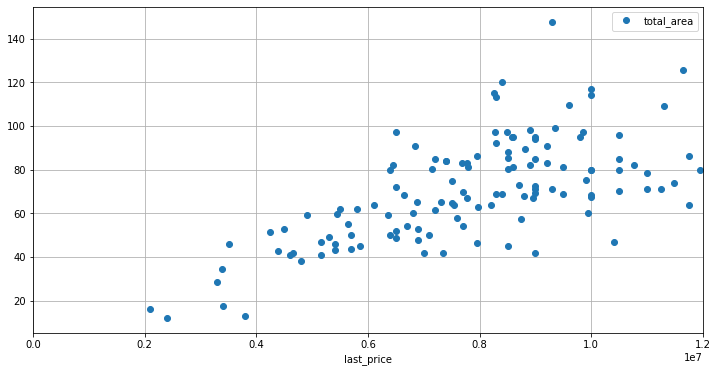

In [85]:
center_data = data.query('cityCenters_nearest < 2500')

#center_data.plot(x = 'rooms', y='price_for_m_sq', 
             #style='o', grid=True, figsize=(15, 6))

#center_data.plot(x = 'ceiling_height', y='price_for_m_sq', 
             #style='o', grid=True, figsize=(15, 6))

#center_data.plot(x = 'total_area', y='price_for_m_sq', 
             #style='o', grid=True, figsize=(15, 6))

#center_data.plot( x = 'cityCenters_nearest', y='price_for_m_sq', 
             #style='o', grid=True, figsize=(15, 6))

center_data.plot(x='last_price', y='total_area', 
             style='o', grid=True, figsize=(12, 6))

plt.xlim(0, 12000000)
print(center_data['total_area'].corr(center_data['last_price']))

0.5941004149266361


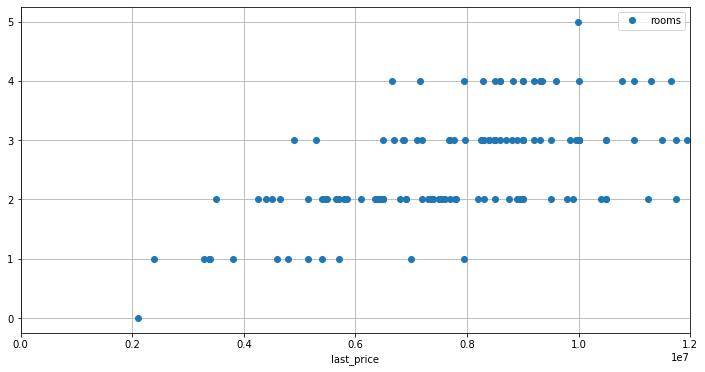

In [86]:
center_data.plot(x='last_price', y='rooms', 
             style='o', grid=True, figsize=(12, 6))

plt.xlim(0, 12000000)
print(center_data['rooms'].corr(center_data['last_price']))

-0.029373888380131618


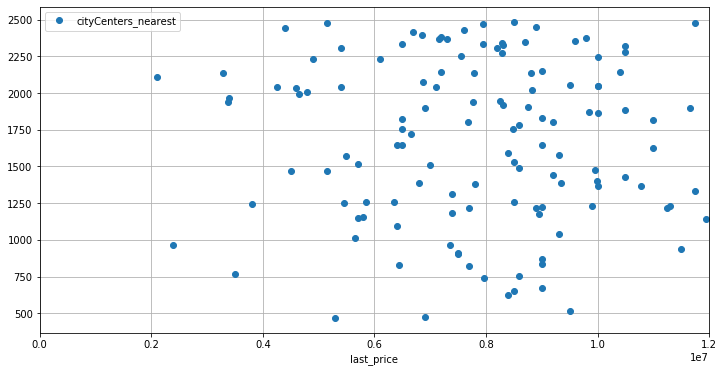

In [87]:

center_data.plot(x='last_price', y='cityCenters_nearest', 
             style='o', grid=True, figsize=(12, 6))

plt.xlim(0, 12000000)
print(center_data['cityCenters_nearest'].corr(center_data['last_price']))

0.11370729815302853


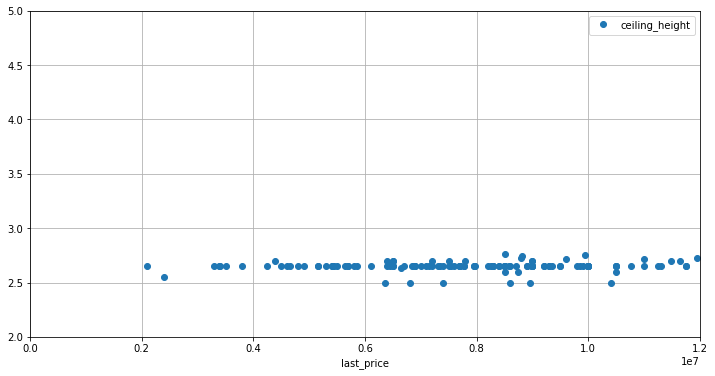

In [88]:
center_data.plot(x='last_price', y='ceiling_height', 
             style='o', grid=True, figsize=(12, 6))
plt.ylim(2, 5)
plt.xlim(0, 12000000)
print(center_data['ceiling_height'].corr(center_data['last_price']))

0.06958749250121637


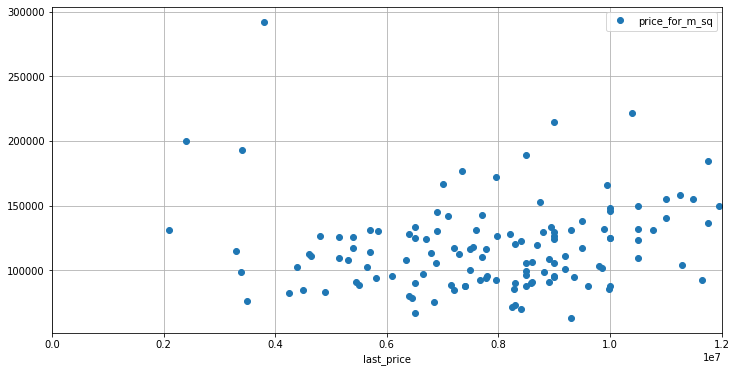

In [89]:
center_data.plot(x='last_price', y='price_for_m_sq', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0, 12000000)
print(center_data['price_for_m_sq'].corr(center_data['last_price']))

(0, 12000000)

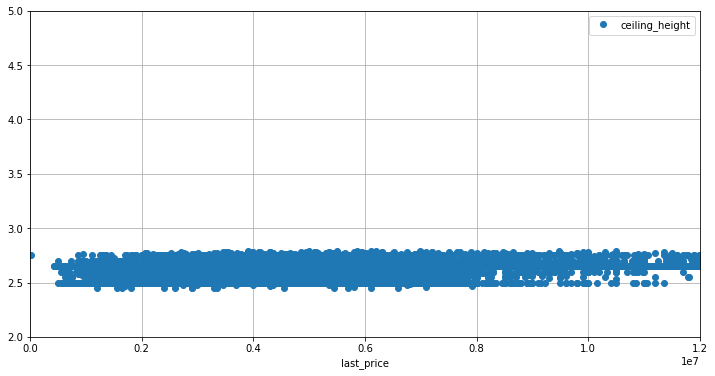

In [76]:
data.plot(x='last_price', y='ceiling_height', 
             style='o', grid=True, figsize=(12, 6))
plt.ylim(2, 5)
plt.xlim(0, 12000000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9692badd8>]],
      dtype=object)

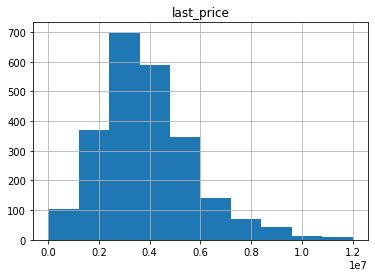

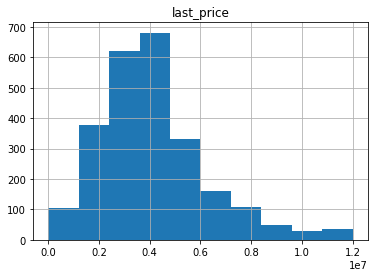

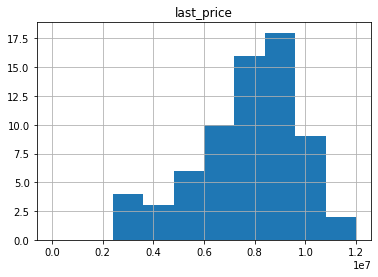

In [91]:
center_data_floor_cat = [(center_data[center_data['floor_category']== 'первый']['floor_category'].count()) ,
                         (center_data[center_data['floor_category']== 'последний']['floor_category'].count()) ,
                         (center_data[center_data['floor_category']== 'другой']['floor_category'].count())]

center_data_first = center_data.query('floor_category == "первый"')
data_first.hist(bins = 10, column = ['floor_category', 'last_price'], range = (0, 12000000))

center_data_last = center_data.query('floor_category == "последний"')
data_last.hist(bins = 10, column = ['floor_category', 'last_price'], range = (0, 12000000))

center_data_other = center_data.query('floor_category == "другой"')
center_data_other.hist(bins = 10, column = ['floor_category', 'last_price'], range = (0, 12000000))



После рассмотрения полученных графиков по срезу данных центральной группы недвижимости я пришел к выводу, что значения для центральной группы в целом отражают зависимости по всему набору данных.

### Шаг 5. Общий вывод

Я провел анализ данных по архиву объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Отмечу главные промежуточные выводы:

    1) Основной диапазон цен на недвижимость охватывает от 3млн до 5млн

    2) Чаще всего можно найти недвижимость с одной-тремя комнатами

    3) Самые распространенные для продажи объекты недвижимости имеют высоту потолков в диапазоне 2,4-3 метра

    4) Чаще всего можно найти недвижимость общей площадью 30-60 м^2
    
    5) Недвижимость чаще всего удается продать за 70-100 дней
    
    6) Наибольшую часть недвижимости составляет группа общей площадью от 18 до 140 м^2. Чаще всего можно найти недвижимость площадью от 35 до 100 м^2
    
    7) Наибольшую часть недвижимости по высоте потолков составляет группа от 2.4м до 2.8м. Чаще всего можно найти недвижимость с высотой потолков 2.5м - 2.7м
    
    8) Наибольшую часть недвижимости по количеству комнат составляет группа от 1 до 6. Чаще всего можно найти недвижимость с количеством комнат 1-4
    
    9)После рассмотрения полученных графиков по срезу данных центральной группы недвижимости я пришел к выводу, что значения для центральной группы ,в целом, отражают зависимости по всему набору данных. 
  